<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula11a_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def criaDataset(n=20):
  X = np.random.uniform(size=(n,2))
  y = np.array(X[:,0]>X[:,1], dtype=int) * 2 - 1
  return X, y

X, y = criaDataset()

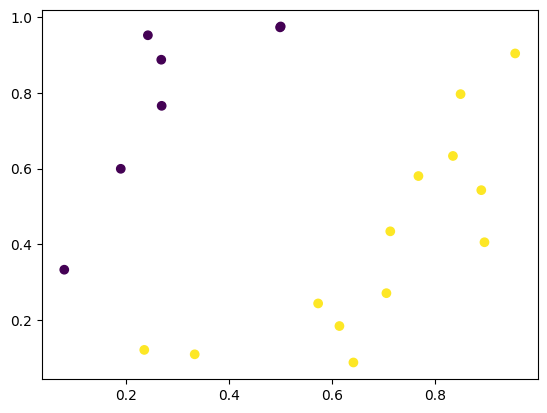

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

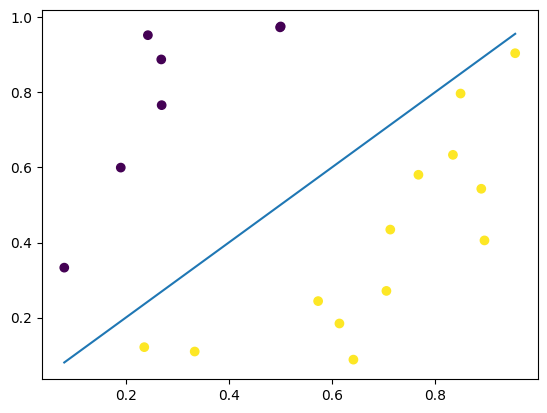

In [ ]:
def plotHiperplano(X, y, vetor, intercept=0):
  x0min = np.min(X[:,0])
  x0max = np.max(X[:,0])
  xs = np.linspace(x0min, x0max, 2)
  ys = (-vetor[0]/vetor[1])*xs - intercept/vetor[1]
  plt.plot(xs, ys)
  plt.scatter(X[:,0], X[:,1], c=y)


plotHiperplano(X, y, [1, -1], 0)
plt.show()

In [ ]:
def sign(a):
  if a >= 0:
    return 1
  else:
    return -1

1.0


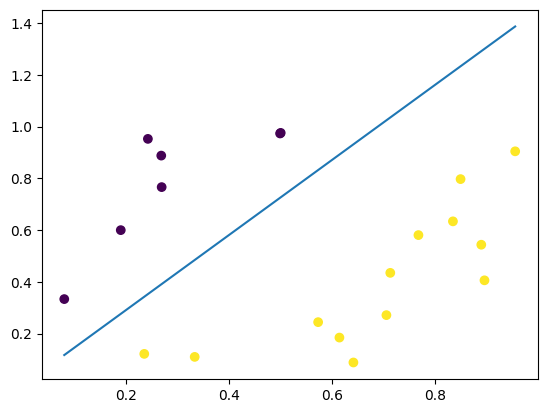

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class PLA(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
    self.max_iter = max_iter

  def fit(self, X, y):
    self.w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      idx = np.random.permutation(X.shape[0])
      for i in idx:
        a = np.dot(X[i], self.w)
        ypred = sign(a)
        if ypred != y[i]:
          self.w += np.dot(X[i], y[i])
    return

  def predict(self, X):
    return np.array([sign(np.dot(x, self.w)) for x in X])

clf = PLA()
clf.fit(X, y)
ypred = clf.predict(X)
print(accuracy_score(y, ypred))
plotHiperplano(X, y, clf.w)
plt.show()

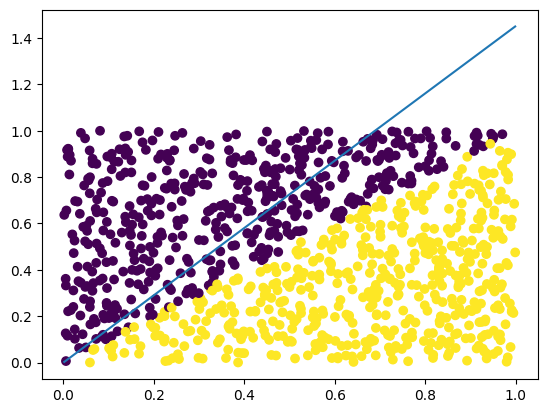

In [ ]:
Xt, yt = criaDataset(1000)
ypredt = clf.predict(Xt)
accuracy_score(yt, ypredt)
plotHiperplano(Xt, yt, clf.w)
plt.show()

1.0


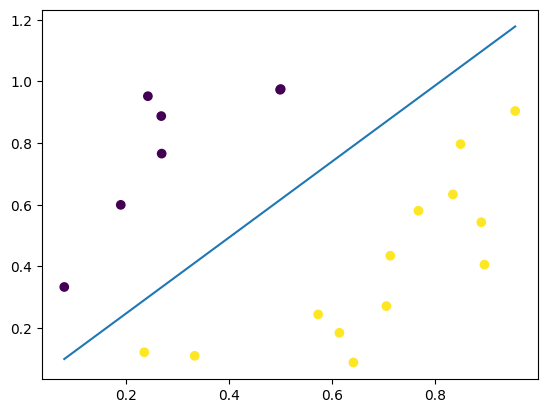

0.902


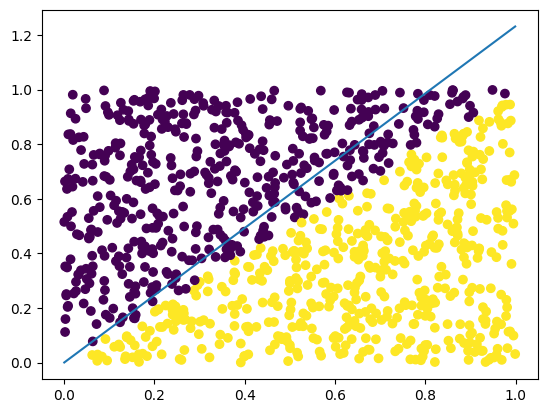

In [ ]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.1):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    self.w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = (y - ypred)
      if sum(erros) == 0:
        break
      self.w += np.dot(erros, X)*self.learning_rate
    return

  def predict(self, X):
    return np.array([sign(np.dot(x, self.w)) for x in X])

clf = Perceptron()
clf.fit(X, y)
ypred = clf.predict(X)
print(accuracy_score(y, ypred))
plotHiperplano(X, y, clf.w)
plt.show()

Xt, yt = criaDataset(1000)
ypredt = clf.predict(Xt)
print(accuracy_score(yt, ypredt))
plotHiperplano(Xt, yt, clf.w)
plt.show()